In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randn

## Define and visualize problem

In [2]:
def f(theta):
    return 0.5 * np.abs(theta) ** 2

In [3]:
def gradient(theta):
    return theta

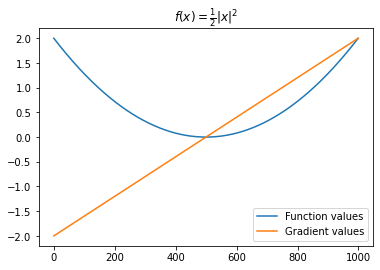

In [4]:
x = np.linspace(-2, 2, 1000)
fx = np.array([f(xx) for xx in x])
gx = np.array([gradient(xx) for xx in x])
plt.figure()
plt.plot(fx, label="Function values")
plt.plot(gx, label="Gradient values")
plt.title(r"$f(x) = \frac{1}{2}\vert x \vert ^2$")
plt.legend()
plt.show()

## Implement SGD and averaged SGD

In [5]:
def gamma(C, alpha, t):
    return C / t ** alpha

In [6]:
def sgd(fn, gradient_fn, gamma_fn, theta_0):
    # initialization
    theta = theta_0()
    
    # logging
    hist = []
    
    # iteration
    for it in range(1, n):
        g = gradient_fn(theta)
        theta -= gamma_fn(it) * g
        
        hist.append([theta, fn(theta)])
    return hist

In [7]:
def sgd_ave(fn, gradient_fn, gamma_fn, theta_0):
    # initialization
    theta = theta_0()
    theta_ave = np.copy(theta)
    
    # logging
    hist = []
    
    # iteration
    for it in range(1, n):
        g = gradient_fn(theta)
        theta -= gamma_fn(it) * g
        theta_ave = ((it - 1) * theta_ave + theta) / (it + 1)
        hist.append([theta_ave, fn(theta_ave)])
    return hist

In [8]:
def sgd_xp(sigma_noise, N, C, alpha):
    res = []
    for _ in range(N):
        res.append(np.array(sgd(f, lambda x: gradient(x) + sigma_noise * randn(), lambda x: gamma(C, alpha, x), theta_0)))
    res = np.array(res)
    hparams = {"C": C, "alpha": alpha}
    return (res[:, :, 1] - res[:, :, 1].min(axis=1)[:, np.newaxis]).mean(axis=0), hparams

In [9]:
def sgd_ave_xp(sigma_noise, N, C, alpha):
    res = []
    for _ in range(N):
        res.append(np.array(sgd_ave(f, lambda x: gradient(x) + sigma_noise * randn(), lambda x: gamma(C, alpha, x), theta_0)))
    res =  np.array(res)
    hparams = {"C": C, "alpha": alpha}
    return (res[:, :, 1] - res[:, :, 1].min(axis=1)[:, np.newaxis]).mean(axis=0), hparams

## Simulation parameters and plotting

In [10]:
theta_0 = lambda : - 2.0

In [11]:
n = int(1e5)

In [12]:
C_list = [1/5, 1, 5]

In [13]:
N = 50

In [14]:
sigma_noise = 1

In [15]:
alpha = 0.5

In [16]:
sgd_res = []
for C in C_list:
    sgd_res.append(sgd_xp(sigma_noise, N, C, alpha))

In [17]:
sgd_ave_res = []
for C in C_list:
    sgd_ave_res.append(sgd_ave_xp(sigma_noise, N, C, alpha))

In [18]:
cmap = plt.cm.tab10

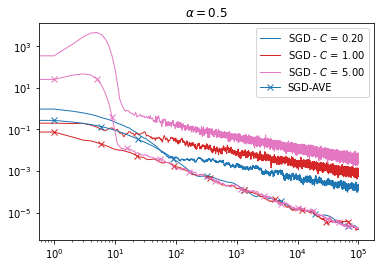

In [19]:
n_lines = len(sgd_res)
color_idx = np.linspace(0, 1, n_lines + 1)
for i, (means, params) in enumerate(sgd_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD - $C$ = {params['C']:.2f}",
        linewidth=1,
    )
for i, (means, params) in enumerate(sgd_ave_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD-AVE" if i == 0 else None,
        marker="x",
        markevery=0.1,
        linewidth=1,
    )
plt.title(fr"$\alpha={alpha:.1f}$")
plt.legend()
plt.show()
# plt.savefig(f"../memoir/figures/fig2-5.png", dpi=600)

In [20]:
alpha = 1.0

In [21]:
sgd_res = []
for C in C_list:
    sgd_res.append(sgd_xp(sigma_noise, N, C, alpha))

In [22]:
sgd_ave_res = []
for C in C_list:
    sgd_ave_res.append(sgd_ave_xp(sigma_noise, N, C, alpha))

In [23]:
cmap = plt.cm.tab10

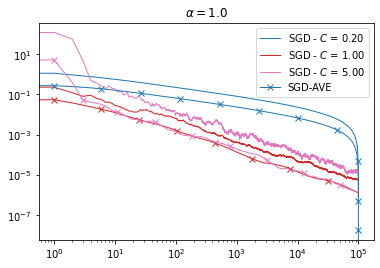

In [24]:
n_lines = len(sgd_res)
color_idx = np.linspace(0, 1, n_lines + 1)
for i, (means, params) in enumerate(sgd_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD - $C$ = {params['C']:.2f}",
        linewidth=1,
    )
for i, (means, params) in enumerate(sgd_ave_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD-AVE" if i == 0 else None,
        marker="x",
        markevery=0.1,
        linewidth=1,
    )
plt.title(fr"$\alpha={alpha:.1f}$")
plt.legend()
# plt.savefig(f"../memoir/figures/fig2-1.png", dpi=600)
plt.show()